In [2]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
input_csv = '../data/mock/wog_overview_level2.csv'
df = pd.read_csv(input_csv)

In [4]:
print(df)

  Service Classification  Sum of Total Financial Year
0     Corporate Services    15700000.0        2014-15
1     Corporate Services    17500000.0        2015-16
2     Financial Services    11900000.0        2014-15
3     Financial Services    13500000.0        2015-16
4            HR Services     9900000.0        2014-15
5            HR Services     9000000.0        2015-16
6         Major Projects           NaN        2014-15
7         Major Projects    10100000.0        2015-16
8                    ERP      400000.0        2014-15
9                    ERP      400000.0        2015-16


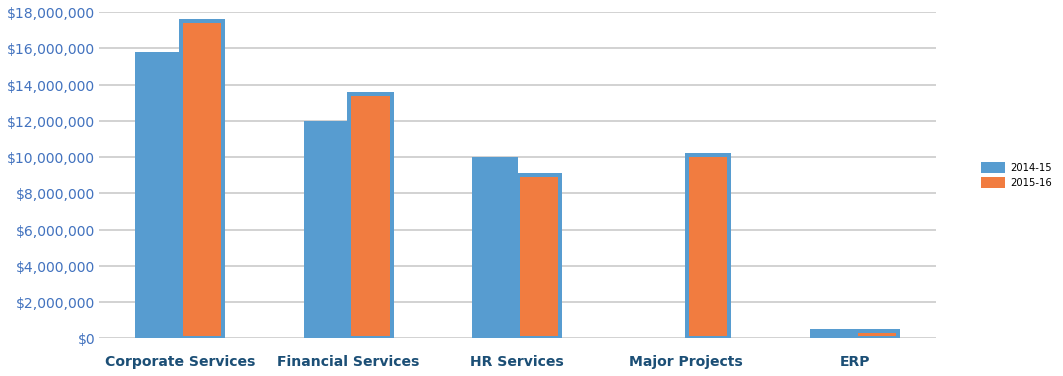

In [5]:
# Initialize figure and axes
fig, ax = plt.subplots(nrows=1, ncols=1)

pos = range(len(df[df['Financial Year'] == '2015-16']))
width = 0.25

group1 = df[df['Financial Year'] == '2014-15']['Sum of Total']
group2 = df[df['Financial Year'] == '2015-16']['Sum of Total']

ax.bar([x - 0.13 for x in pos], group1, color='#579cd0', width=width, linewidth=4, edgecolor='#579cd0', zorder=2)
ax.bar([x + 0.13 for x in pos], group2, color='#f17c40', width=width, linewidth=4, edgecolor='#579cd0', zorder=2)

# Set chart properties and formatting
fig.set_size_inches(15,6)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x,pos: '${:,.0f}'.format(x)))
ax.tick_params(axis='y', which='major', labelsize=14, labelcolor='#4373bf', length=0)
ax.tick_params(axis='x', which='major', labelsize=14, labelcolor='#1c4f76', length=0)
ax.set_xticks([p for p in pos])
xlabels = df['Service classification'].unique()
ax.set_xticklabels(xlabels, fontweight='semibold', position=(0,-0.04))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.yaxis.grid(color='lightgray', linewidth=2)

# Draw the legend
patch1 = mpatches.Patch(color='#579cd0', label='2014-15', linewidth=4)
patch2 = mpatches.Patch(color='#f17c40', label='2015-16', linewidth=4)
ax.legend(handles=[patch1, patch2], frameon=False, loc='center right', bbox_to_anchor=(1.15, 0.5))
ax.set_ylim(0, 18000000)

# Write to a file
fig.savefig('../reports/figures/mock/wog_overview_level2.pdf', bbox_inches='tight')